### Insulation score

In [1]:
from matplotlib import pyplot as plt
from pytadbit.parsers.hic_parser import load_hic_data_from_bam

In [3]:
%%bash

ls ../results_60M/B_rep1/03_filtered_reads/intersection_f69652928b.bam
ls ../results_60M/B_rep1/04_normalization/biases_100kb_dd4e283c12.pickle

../results_60M/B_rep1/03_filtered_reads/intersection_f69652928b.bam
../results_60M/B_rep1/04_normalization/biases_100kb_dd4e283c12.pickle


In [2]:
reso = 100000
hic_data1 = load_hic_data_from_bam('../results_60M/B_rep1/03_filtered_reads/intersection_f69652928b.bam',
                                  resolution=reso,
                                  biases='../results_60M/B_rep1/04_normalization/biases_100kb_dd4e283c12.pickle',
                                  ncpus=8)


  (Matrix size 1598x1598)                                                      [2022-11-24 14:47:36]

  - Parsing BAM (100 chunks)                                                   [2022-11-24 14:47:36]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Getting matrices                                                           [2022-11-24 14:47:55]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100



In [5]:
%%bash

ls ../results_60M/PSC_rep1/03_filtered_reads/intersection_f69652928b.bam
ls ../results_60M/PSC_rep1/04_normalization/biases_100kb_dd4e283c12.pickle

../results_60M/PSC_rep1/03_filtered_reads/intersection_f69652928b.bam
../results_60M/PSC_rep1/04_normalization/biases_100kb_dd4e283c12.pickle


In [4]:
hic_data2 = load_hic_data_from_bam('../results_60M/PSC_rep1/03_filtered_reads/intersection_f69652928b.bam',
                                  resolution=reso,
                                  biases='../results_60M/PSC_rep1/04_normalization/biases_100kb_dd4e283c12.pickle',
                                  ncpus=8)


  (Matrix size 1598x1598)                                                      [2022-11-24 14:48:27]

  - Parsing BAM (100 chunks)                                                   [2022-11-24 14:48:27]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Getting matrices                                                           [2022-11-24 14:48:53]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100



Insulation score (Crane et al. 2015 https://doi.org/10.1038/nature14450) can be used to build an insulation profile of the genome and, with a simple transformation, to identify TAD borders.

In [6]:
from pytadbit.tadbit import insulation_score, insulation_to_borders

The two important parameter to define are the window size, the distance from the diagonal and the delta.
 - the square size should be 500 kb as close as possible from the diagonal
 - the delta is to look for increases in insulation around a given bin. Should be around 100 kb.

In [7]:
wsize = (1, 5)

In [8]:
insc1, delta1 = insulation_score(hic_data1, [wsize], resolution=100000, normalize=True, delta=2)
insc2, delta2 = insulation_score(hic_data2, [wsize], resolution=100000, normalize=True, delta=2)

 - computing insulation in band 1-5
 - computing insulation in band 1-5


/home/participant/anaconda3/envs/tadbit/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


Once defined the insulation score and the values of delta can be used to search for borders.

In [9]:
borders1 = insulation_to_borders(insc1[wsize], delta1[wsize], min_strength=0.1)
borders2 = insulation_to_borders(insc2[wsize], delta2[wsize], min_strength=0.1)

Currently the representation is not available in TADbit as for the other methods, but we can easily plot it:

In [10]:
borders1

[(47, 0.1826149449884571),
 (61, 0.274154967946737),
 (73, 0.46072489647115544),
 (86, 0.6160985981346043),
 (104, 0.9322668590196286),
 (128, 0.11298317664289215),
 (139, 0.2668830267086333),
 (153, 0.6241789842704104),
 (163, 0.7125737114758703),
 (179, 0.7135994654064828),
 (191, 0.7285672657618156),
 (205, 0.715189539487219),
 (213, 0.2240814612562847),
 (224, 0.6909389957010426),
 (271, 0.7599876001613717),
 (281, 0.3145296385549603),
 (290, 0.6374716395462539),
 (305, 0.6628165778521018),
 (316, 0.29774623100517106),
 (323, 0.3442311556348059),
 (329, 0.6241958906355638),
 (338, 0.43953049517553344),
 (355, 0.7942112791630416),
 (365, 0.5856663325149578),
 (374, 0.8385647156378637),
 (382, 0.6618090094128983),
 (389, 0.5494616159829204),
 (405, 0.8091058244311631),
 (418, 0.6880440610567444),
 (452, 0.24403203055528389),
 (488, 0.23963445643871473),
 (501, 0.4731012508846735),
 (511, 0.9321437999702102),
 (521, 0.8462060975478971),
 (528, 0.4926026354374091),
 (534, 0.72443408045

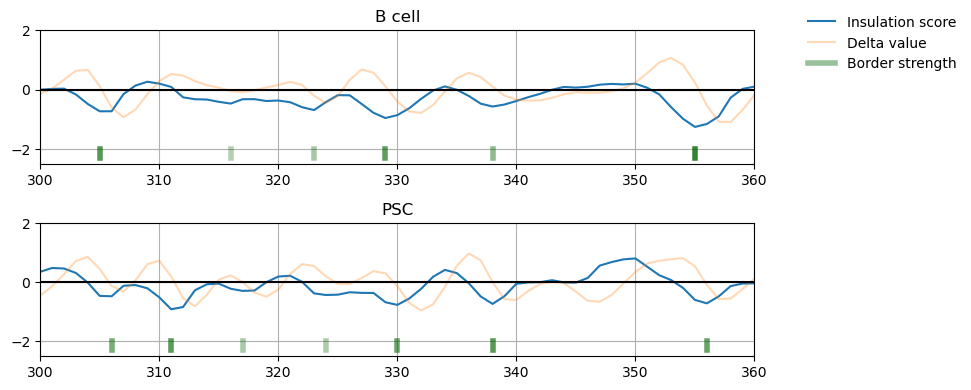

In [11]:
plt.figure(figsize=(10, 4))

plt.subplot(2, 1, 1)
plt.title('B cell')
l1 = plt.plot([insc1[(wsize)].get(i, float('nan')) for i in range(max(insc1[(wsize)]))], label='Insulation score')
l2 = plt.plot([delta1[(wsize)].get(i, float('nan')) for i in range(max(insc1[(wsize)]))],
         alpha=0.3, label='Delta value')
for b, c in borders1:
    l3 = plt.plot([b] * 2, [-2, -2.3], color='darkgreen', alpha=c, lw=4, label='Border strength')
    
plt.grid()
plt.axhline(0, color='k')
plt.ylim(-2.5, 2)
plt.xlim(300, 360)

plt.legend(l1 + l2 + l3, [l.get_label() for l in l1 + l2 + l3], frameon=False, bbox_to_anchor=(1.3, 0.6))

plt.subplot(2, 1, 2)
plt.title('PSC')
plt.plot([insc2[(wsize)].get(i, float('nan')) for i in range(max(insc2[(wsize)]))])
plt.plot([delta2[(wsize)].get(i, float('nan')) for i in range(max(insc2[(wsize)]))], alpha=0.3)
for b, c in borders2:
    plt.plot([b] * 2, [-2, -2.3], color='darkgreen', alpha=c, lw=4)
plt.grid()
plt.axhline(0, color='k')
plt.ylim(-2.5, 2)
_ = plt.xlim(300, 360)
plt.tight_layout()

## TADs with TopDom

Now, we move to the TADs detection. In this notebook we will detect TAD borders at 100kbp resolution. 

<!-- The comparison of TAD borders at high resolutions becomes difficult because the border positions are not as sharply defined as at lower resolutions.

An example of consistency between TAD borders is shown in the following graph. TAD borders are called at 1 kb resolution (insulation score-based method). We assume that there should be a high ratio of conservation between the 4 replicates and as we see that's true for resolutions lower than approximately 100kbp. If our bin size is for example 50kbp, we only reach the same ratio of consistency if we consider TAD borders found 2 bins away as being the same border in the different replicates.

<img src="images/TAD_calling_resolution.png"> -->

In [12]:
from pytadbit import Chromosome

In [13]:
chrname = 'chr3'
crm = Chromosome(chrname)
crm.add_experiment('mouse_B',  
                   hic_data=[hic_data1.get_matrix(focus='chr3')],
                   norm_data=[hic_data1.get_matrix(focus='chr3',normalized=True)],
                   resolution=reso)
crm.add_experiment('mouse_PSC', 
                   hic_data=[hic_data2.get_matrix(focus='chr3')],
                   norm_data=[hic_data2.get_matrix(focus='chr3',normalized=True)],
                   resolution=reso)

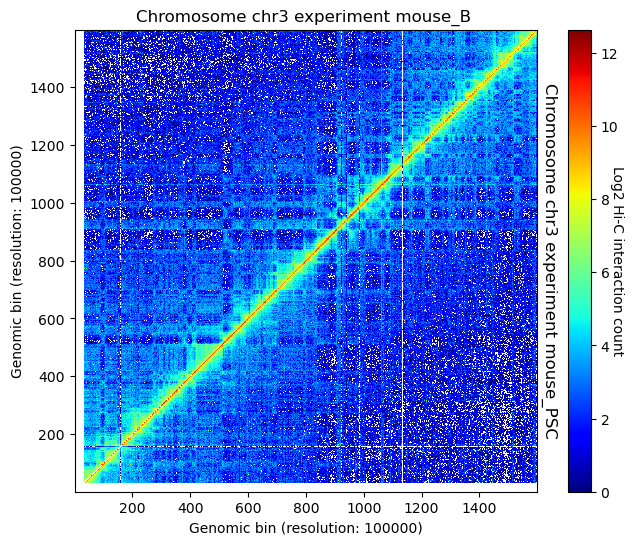

In [14]:
crm.visualize([('mouse_B', 'mouse_PSC')])

TopDom identifies TAD borders based on the assumption that contact frequencies between regions upstream and downstream of a border are lower than those between two regions within a TAD. The algorithm only depends on a single parameter corresponding to the window size. The algorithm provides a measure (from 0 to 10) of confidence on the accuracy of the border detection (https://www.ncbi.nlm.nih.gov/pubmed/26704975).

In [15]:
crm.find_tad(['mouse_B', 'mouse_PSC'], n_cpus=8, use_topdom=True)

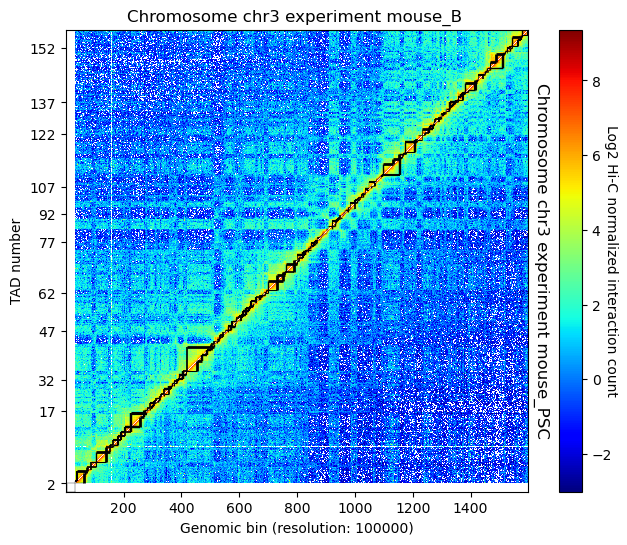

In [16]:
crm.visualize([('mouse_B', 'mouse_PSC')], normalized=True, paint_tads=True)

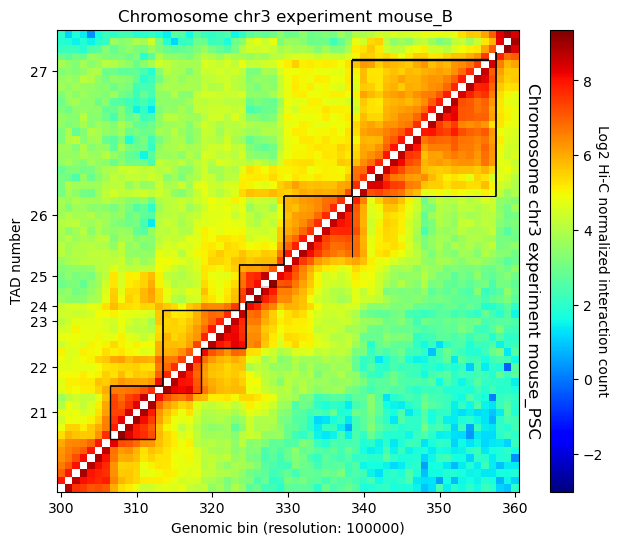

In [17]:
crm.visualize([('mouse_B', 'mouse_PSC')], normalized=True, paint_tads=True, focus=(300, 360))

## Comparison of TAD borders

The TAD borders can be aligned, using a simple reciprocal best hit strategy:

In [21]:
ali = crm.align_experiments(['mouse_B', 'mouse_PSC'], max_dist=(5*reso))

In the plots below, each arc represents a TAD. Between two consecutive arcs the triangle mark the border. This triangle is colored depending on the confidence of the TAD border call. 

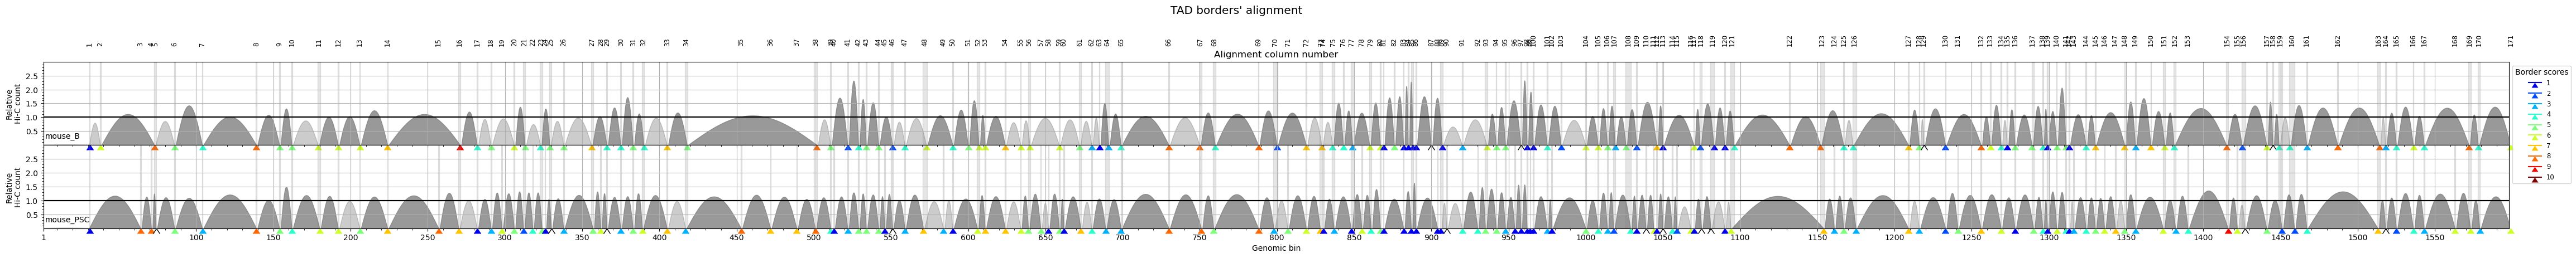

In [22]:
ali.draw(ymax=3)

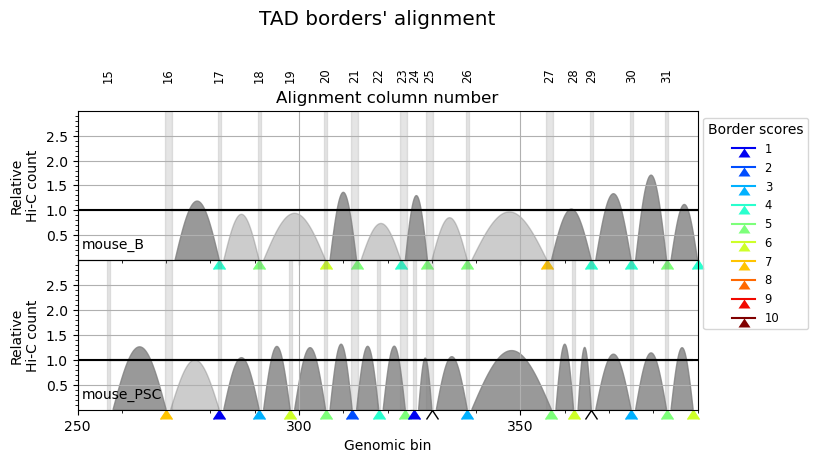

In [26]:
ali.draw(focus=(250, 390), ymax=3)

<bound method Alignment.write_alignment of Alignment of boundaries (length: 171, number of experiments: 2)>